In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 

In [52]:
#data
#https://finance.yahoo.com/quote/AAPL/history?p=AAPL&.tsrc=fin-srch
#we will be using the Apple stock prices from 1st January 2013 to 31 December 2017

apple_training_complete = pd.read_csv('../../data/time_series/apple_training.csv') 
print(apple_training_complete.shape)
apple_training_complete.head()

(1499, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,54.206390,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.923737,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,55.217865,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.679771,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.364014,121039100


In [41]:
#we are only interested in the opening price of the stock. Therefore, we will filter all the data from our training set and will retain only the values for the Open column

apple_training_processed = apple_training_complete.iloc[:, 1:2].values  

In [53]:
#normalize
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [43]:
features_set = []  
labels = []  
for i in range(60, 1499):  
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])


In [44]:
#We need to convert both the feature_set and the labels list to the numpy array before we can use it for training. 

features_set, labels = np.array(features_set), np.array(labels)

In [45]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [46]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [47]:
model = Sequential()  
#The first parameter to the input_shape is the number of time steps 
#while the last parameter is the number of indicators.
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  

#Dropout layer is added to avoid over-fitting
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

# The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output
model.add(Dense(units = 1))  
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [48]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


Epoch 1/100
1439/1439 [==============================] - 11s 7ms/step - loss: 0.0247: 3s -
Epoch 2/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0039
Epoch 3/100
1439/1439 [==============================] - 10s 7ms/step - loss: 0.0032
Epoch 4/100
1439/1439 [==============================] - 8s 5ms/step - loss: 0.0032
Epoch 5/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0035
Epoch 6/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0031
Epoch 7/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0026
Epoch 8/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0027
Epoch 9/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0033
Epoch 10/100
1439/1439 [==============================] - 9s 6ms/step - loss: 0.0027
Epoch 11/100
1439/1439 [==============================] - 8s 6ms/step - loss: 0.0026
Epoch 12/100
1439/1439 [==============================] - 8s 6ms/s

1439/1439 [==============================] - 8s 6ms/step - loss: 9.5335e-04
Epoch 96/100
1439/1439 [==============================] - 11s 7ms/step - loss: 7.9425e-04
Epoch 97/100
1439/1439 [==============================] - 8s 6ms/step - loss: 9.4815e-04
Epoch 98/100
1439/1439 [==============================] - 9s 6ms/step - loss: 0.0010
Epoch 99/100
1439/1439 [==============================] - 9s 6ms/step - loss: 8.1059e-04
Epoch 100/100
1439/1439 [==============================] - 9s 6ms/step - loss: 7.9869e-04


In [51]:
#For the sake of prediction, we will use the Apple stock prices for the month of January 2018.

apple_testing_complete = pd.read_csv('../../data/time_series/apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

print(apple_testing_complete.shape)
apple_testing_complete.head()

(20, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,169.712067,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,169.682510,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,170.470703,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,172.411560,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.771179,20567800


In [26]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)  

In [57]:
test_inputs = apple_total[len(apple_total) - len(apple_testing) - 60:].values  
test_inputs.size

80

In [28]:
#normalize

test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs)  

In [29]:
# final test input set that will contain previous 60 stock prices for the month of January(80 values ).  
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])

In [30]:
#Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM. 

test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [31]:
predictions = model.predict(test_features) 

In [59]:
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training.

predictions = scaler.inverse_transform(predictions)  
predictions.size

20

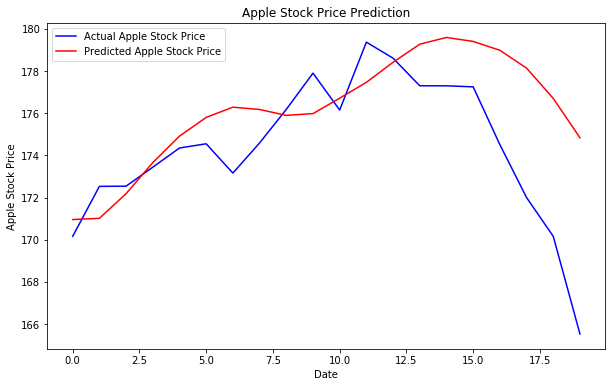

In [33]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  